## sentence transformer library: https://huggingface.co/sentence-transformers

In [1]:
! pip install -U sentence-transformers -q

In [2]:
from sentence_transformers import SentenceTransformer
from torch.nn.functional import cosine_similarity

In [3]:
# Load a sentence embedding model (trained for similarity tasks)
model = SentenceTransformer("all-MiniLM-L6-v2")

In [4]:
sentence1 = "Hello, how are you?"
sentence2 = "Hi, how do you do?"

# Step 1: Encode both sentences into embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)

c:\MY_Folder\Git_FineTuning_Folder\FineTuning_Files\finetune_env\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [5]:
embedding1

tensor([ 1.9097e-02,  3.4465e-02,  9.1628e-02,  7.0165e-02, -2.9947e-02,
        -8.4191e-02,  4.5814e-02,  4.9586e-03, -9.1893e-02,  1.7401e-02,
        -8.8162e-03, -6.6146e-04, -2.8557e-02, -2.1950e-02,  5.5167e-02,
        -4.9837e-02,  8.9881e-02, -8.8957e-02, -1.1236e-01,  3.9001e-02,
        -6.6071e-02,  2.6095e-02,  3.6531e-02,  6.1390e-02, -5.7125e-02,
        -5.4639e-02,  3.0366e-02,  3.2388e-02,  1.2645e-02, -1.0569e-01,
        -5.8346e-02,  6.7329e-02, -4.0756e-02,  6.4398e-03,  5.6987e-03,
         5.2853e-02, -3.9775e-02, -1.1855e-01,  2.1162e-03, -1.6693e-02,
         2.8338e-02, -3.7438e-02, -2.1371e-02, -4.1475e-02,  8.4972e-02,
        -6.8694e-02,  2.4652e-02,  7.1668e-02,  1.0130e-01,  4.6516e-03,
        -1.0044e-01, -3.4094e-02, -4.0176e-02,  3.6907e-02,  6.0806e-02,
         4.1485e-02, -6.4642e-02,  4.0751e-03,  6.7232e-02, -9.0082e-03,
         2.8548e-02,  3.9759e-02, -8.3564e-02,  7.8186e-02,  4.7506e-02,
        -3.4571e-02, -7.5742e-02, -5.4552e-02, -3.2

In [6]:
len(embedding1)

384

In [7]:
embedding2 = model.encode(sentence2, convert_to_tensor=True)

In [8]:
embedding2

tensor([ 7.9273e-03,  1.0824e-02,  6.4440e-02,  4.1073e-02, -5.5623e-02,
        -2.4012e-02,  3.3522e-02, -1.3802e-02, -3.6286e-02, -1.3766e-02,
        -9.2297e-03, -2.7550e-02, -2.6325e-02, -5.5530e-02,  5.6302e-02,
         1.6543e-02, -4.4173e-02,  7.4477e-02, -1.2451e-01, -2.6206e-02,
         1.3162e-02, -9.1665e-02, -3.2998e-02, -1.4401e-02,  3.6053e-02,
        -4.9651e-02,  1.4674e-02,  6.0289e-02, -1.6662e-02, -5.2135e-02,
         2.7662e-02,  5.0990e-02,  9.2509e-03,  2.3633e-02, -5.3486e-02,
         2.0829e-02, -2.8609e-02, -6.6983e-02,  2.3909e-03, -4.8774e-02,
         4.8256e-02, -7.1694e-02, -2.1886e-02,  2.9340e-02,  3.2780e-02,
        -5.9117e-02, -3.6032e-02,  2.3597e-02,  7.0321e-02,  2.6210e-02,
        -9.3737e-02, -6.2379e-02, -3.5959e-02,  6.2627e-02,  1.2345e-02,
         7.7443e-02,  2.0379e-03,  1.2663e-02,  5.9305e-02, -7.8939e-03,
         4.6994e-03,  2.1612e-02, -5.0623e-02,  8.7753e-02,  3.8511e-03,
        -3.5347e-02, -4.3526e-02, -3.0914e-02, -1.4

In [9]:
similarity = cosine_similarity(embedding1, embedding2, dim=0)
print(f"Similarity: {similarity.item():.4f}")

Similarity: 0.5163


## Example of AutoModelClass with Different heads

| Task                        | Class Name                                          | Description                                          |
| --------------------------- | --------------------------------------------------- | ---------------------------------------------------- |
| Base Model               | `AutoModel`                                         | Just embeddings (no head), for feature extraction    |
| Masked LM                | `AutoModelForMaskedLM`                              | For BERT-style `[MASK]` prediction                   |
| Sequence Classification | `AutoModelForSequenceClassification`                | For sentence-level tasks like sentiment, spam        |
| Token Classification     | `AutoModelForTokenClassification`                   | For NER, POS tagging (token-level labels)            |
| Multiple Choice          | `AutoModelForMultipleChoice`                        | For MCQ tasks (e.g., SWAG dataset)                   |
| Next Sentence Prediction | `AutoModelForNextSentencePrediction`                | For NSP (mainly BERT pretraining)                    |
| Causal LM (Text Gen)     | `AutoModelForCausalLM`                              | For GPT-style models (left-to-right text generation) |
| Seq2Seq LM               | `AutoModelForSeq2SeqLM`                             | For translation, summarization (T5, BART)            |
| Question Answering       | `AutoModelForQuestionAnswering`                     | For extractive QA (SQuAD-style)                      |
| Vision Tasks            | `AutoModelForImageClassification`, etc.             | For image classification (e.g., ViT)                 |
| Audio Tasks              | `AutoModelForAudioClassification`, etc.             | For Wav2Vec, Whisper, etc.                           |
| Conditional Generation   | `AutoModelForConditionalGeneration`                 | For T5/BART-style seq2seq tasks                      |
| Zero-shot Tasks          | `AutoModelForZeroShotClassification` (via pipeline) | For inference without fine-tuning                    |
| Contrastive Learning     | `AutoModelForContrastiveLearning`                   | For embeddings comparison tasks                      |


In [10]:
sentence = "I am doing very happy"

In [15]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [17]:
inputs = tokenizer(sentence, return_tensors="pt")

In [18]:
inputs

{'input_ids': tensor([[ 101,  146, 1821, 1833, 1304, 2816,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [19]:
inputs.pop("token_type_ids")

tensor([[0, 0, 0, 0, 0, 0, 0]])

In [20]:
inputs

{'input_ids': tensor([[ 101,  146, 1821, 1833, 1304, 2816,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [21]:
from transformers import AutoModelForSequenceClassification

In [22]:
clf_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\MY_Folder\Git_FineTuning_Folder\FineTuning_Files\finetune_env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Mohan\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' pa

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [23]:
import torch
with torch.no_grad():
    outputs = clf_model(**inputs)

In [24]:
logits = outputs.logits

In [25]:
predicted_class = torch.argmax(logits, dim=1)

In [26]:
print(predicted_class.item())  # 1 = Positive, 0 = Negative

0


In [27]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [ ]:
gpt_tok = AutoTokenizer.from_pretrained("gpt2")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
sentence = "Transformers are beast"

In [ ]:
gpt_inputs = gpt_tok(sentence, return_tensors="pt")

In [ ]:
with torch.no_grad():
    gpt_output = gpt_model.generate(
        gpt_inputs["input_ids"],
        max_length=gpt_inputs["input_ids"].shape[1] + 5,  # predict next 5 tokens
        do_sample=False  # deterministic output
    )


In [ ]:
generated_text = gpt_tok.decode(gpt_output[0], skip_special_tokens=True)

In [ ]:
print("GPT-2 generated:", generated_text)

In [ ]:
from transformers import AutoConfig, AutoModel

In [ ]:
config = AutoConfig.from_pretrained("bert-base-uncased")

In [ ]:
print(config.hidden_size)
print(config.num_attention_heads)
print(config.vocab_size)
print(config.hidden_act)  # shows which activation function is used
print(config.num_labels)

In [ ]:
config.num_labels = 5  # change for multi-class classification

In [ ]:
print(config.num_labels)

In [ ]:
model = AutoModel.from_config(config)  # No pretrained weights

In [ ]:
model

| Feature                      | `AutoModel`, `AutoModelForSequenceClassification`, etc. | `AutoConfig`     |
| ---------------------------- | ------------------------------------------------------- | ---------------- |
| Load Pretrained Weights?     | ✅ Yes                                                   | ❌ No             |
| Returns Model?               | ✅ Yes (BERT, DistilBERT, etc.)                          | ❌ No             |
| Used for Training/Inference? | ✅                                                       | ❌ (only config)  |
| Editable for Custom Models?  | Limited                                                 | ✅ Fully Editable |


#### If you want to download the model on your local machine then follow below code

In [ ]:
from huggingface_hub import snapshot_download

In [ ]:
snapshot_download(
    repo_id="bert-base-uncased",
    local_dir="/content/test",   # where to download
    local_dir_use_symlinks=False  # to copy instead of symlinking
)

### Load the model

In [ ]:
from transformers import AutoTokenizer, AutoModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("/content/test")

In [ ]:
tokenizer

In [ ]:
model = AutoModel.from_pretrained("/content/test")

In [ ]:
model

# Inbuilt Pipeline method

| Parameter           | Type                        | Description / Use Case                                                               |
| ------------------- | --------------------------- | ------------------------------------------------------------------------------------ |
| `task`              | `str`                       | Task name like `"text-classification"`, `"text-generation"`, `"summarization"`, etc. |
| `model`             | `str` or `PreTrainedModel`  | Model name (e.g., `"bert-base-uncased"`) or loaded model object                      |
| `tokenizer`         | `str` or Tokenizer Object   | Optional – auto-loaded from model if not given                                       |
| `config`            | `str` or `PretrainedConfig` | Optional – custom configuration (e.g., num labels, dropout, etc.)                    |
| `framework`         | `str` (`"pt"` or `"tf"`)    | Force PyTorch or TensorFlow (auto-detected if not set)                               |
| `device`            | `int` or `str`              | `0` = GPU, `-1` = CPU, `"cuda"` or `"cpu"`                                           |
| `revision`          | `str`                       | Git branch/tag/commit from Hugging Face Hub (e.g., `"main"`, `"v1.0"`)               |
| `use_fast`          | `bool`                      | Whether to use fast tokenizer (defaults to `True`)                                   |
| `token`             | `str` or `bool`             | Hugging Face token (needed for private models or rate limits)                        |
| `device_map`        | `Any`                       | For multi-GPU / model parallelism                                                    |
| `torch_dtype`       | `torch.dtype`               | Force precision: e.g., `torch.float16` for faster inference                          |
| `trust_remote_code` | `bool`                      | Allow loading custom `model.py` logic from HF repo (for advanced/custom models)      |
| `model_kwargs`      | `dict`                      | Extra arguments to pass to model (e.g., `temperature`, `top_p`, `max_length`, etc.)  |
| `feature_extractor` | `str` or Object             | Used for older vision/audio models (now replaced by `image_processor`)               |
| `image_processor`   | `BaseImageProcessor`        | For image tasks (used in ViT, SAM, etc.)                                             |
| `processor`         | `ProcessorMixin`            | For multi-modal models (e.g., Whisper, CLIP, LayoutLMv3)                             |
| `pipeline_class`    | `Any`                       | Custom pipeline class if you’re extending or modifying the base pipeline logic       |
| `**kwargs`          | `Any`                       | Additional pipeline-specific keyword arguments (like `max_length`, `top_k`, etc.)    |


In [ ]:
from transformers import pipeline

In [ ]:
classifier=pipeline("sentiment-analysis")

In [ ]:
classifier("i will learn AI throughout my entire life it is like a passion")

In [ ]:
classifier("mera dost don hai")

In [ ]:
result = pipeline("sentiment-analysis")("Hugging Face is awesome")
print(result)

In [ ]:
lassifier=pipeline("zero-shot-classification")

In [ ]:
res = lassifier(
    "This is a course about Python list comprehension",
    candidate_labels=["education", "politics", "business"],
)

In [ ]:
print(res)

In [ ]:
generation=pipeline("text-generation")

In [ ]:
generation("python is a simple language what is your thought?")

In [ ]:
generation("hello how are you?")

In [ ]:
summarizer=pipeline("summarization")

In [ ]:
text="A large language model (LLM) is a machine learning model that uses deep learning to perform natural language processing (NLP) tasks. LLMs are trained on large amounts of text to learn how to respond to user requests with human-like language."

In [ ]:
print(summarizer(text,max_length=10))

| Property          | Value                                                             |
| ----------------- | ----------------------------------------------------------------- |
| **Model Name**    | `google/long-t5-tglobal-base`                                     |
| **Architecture**  | Long-T5 (based on T5 but designed for *long documents*)           |
| **Type**          | Encoder-decoder Transformer (seq2seq)                             |
| **Token Limit**   | Can handle **16,384 tokens** (way more than normal T5 → 512/1024) |
| **Attention**     | Uses **"Transverse Global Attention"**, better for long contexts  |
| **Pretrained By** | Google Research                                                   |
| **Tasks**         | Mainly for **summarization**, also good for long text generation  |
| **Variants**      | `base`, `large`, `xl` – you are using `base`                      |


In [ ]:
summarizer = pipeline("summarization", model="google/long-t5-tglobal-base")

In [ ]:
summary = summarizer(text, max_length=50, min_length=10, do_sample=False)

In [ ]:
print(summary[0]['summary_text'])

In [ ]:
qa = pipeline("question-answering")
print(qa(question="Where do I work?", context="I work at Hugging Face."))

In [ ]:
from transformers import pipeline
import time

texts = ["I absolutely love transformers!"] * 100

In [ ]:
# BERT
start = time.time()
bert = pipeline("sentiment-analysis", model="bert-base-uncased")
bert(texts)
print("BERT Time:", time.time() - start)

In [ ]:
# DistilBERT
start = time.time()
distil = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
distil(texts)
print("DistilBERT Time:", time.time() - start)

## Evalution Matrixs

In [ ]:
!pip install evaluate
!pip install rouge_score
!pip install evaluate[visualization]

In [ ]:
!pip install -U datasets fsspec

In [ ]:
import evaluate

In [ ]:
accuracy = evaluate.load("accuracy")

In [ ]:
result = accuracy.compute(predictions=[0, 1, 1, 0], references=[0, 1, 0, 0])

In [ ]:
print(result)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments

In [ ]:
# Load dataset subsets
train_dataset = load_dataset("imdb", split="train[:100]")
test_dataset = load_dataset("imdb", split="test[:100]")

In [ ]:
# Load pretrained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
# Tokenize and format
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length")

In [ ]:
# Tokenize train and test
train_encoded = train_dataset.map(tokenize, batched=True)
test_encoded = test_dataset.map(tokenize, batched=True)

In [ ]:
# Format for PyTorch
train_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
# Define Trainer with metrics
args = TrainingArguments(output_dir="eval-check", per_device_eval_batch_size=32,report_to="none")

In [ ]:
trainer = Trainer(model=model, args=args, compute_metrics=compute_metrics)

In [ ]:
metrics = trainer.evaluate(eval_dataset=test_encoded)

In [ ]:
print(metrics)

## bleu, rouge, perplexity

In [ ]:
from evaluate import load

bleu = load("bleu")

# Model output (machine translation)
predictions = ["The cat is sitting on the mat"]

# Human reference translation
references = [["The cat sat on the mat"]]

result = bleu.compute(predictions=predictions, references=references)
print("BLEU Score:", result)

| Metric            | Value | Meaning                        |
| ----------------- | ----- | ------------------------------ |
| `precisions[0]`   | 0.714 | 5/7 unigrams matched           |
| `precisions[1]`   | 0.5   | 3/6 bigrams matched            |
| `precisions[2]`   | 0.2   | 1/5 trigrams matched           |
| `precisions[3]`   | 0.0   | No 4-gram match ⇒ BLEU = 0     |
| `brevity_penalty` | 1.0   | No penalty (longer prediction) |
| `BLEU`            | 0.0   | Killed by zero 4-gram match    |


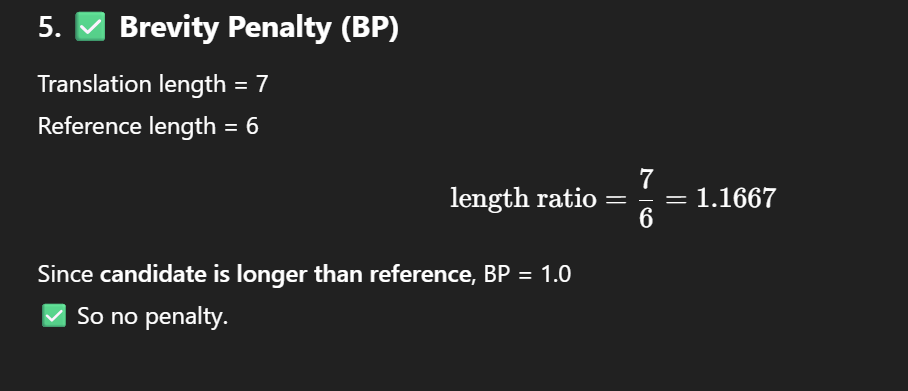

In [ ]:
from evaluate import load

bleu = load("bleu")

# Model-generated headline (prediction)
predictions = ["Government unveils new climate action plan"]

# Real human-written headline (reference)
references = [["Government announces new plan to fight climate change"]]

result = bleu.compute(predictions=predictions, references=references)
print("BLEU Score (Text Gen):", result)


In [ ]:
from evaluate import load

rouge = load("rouge")

# Model-generated summary
predicted_summary = ["Hugging Face develops powerful AI tools."]

# Ground truth (human-written) summary
reference_summary = ["Hugging Face is a company that builds AI models."]

result = rouge.compute(predictions=predicted_summary, references=reference_summary)
print("ROUGE Scores:", result)


| Metric       | Meaning                    | Score | Why                         |
| ------------ | -------------------------- | ----- | --------------------------- |
| `ROUGE-1`    | Unigram recall             | 0.4   | 3/9 words matched           |
| `ROUGE-2`    | Bigram recall              | 0.15  | Only "Hugging Face" matched |
| `ROUGE-L`    | Longest Common Subsequence | 0.4   | "Hugging Face AI" is LCS    |
| `ROUGE-Lsum` | Sentence-level LCS         | 0.4   | Same as above (1 sentence)  |


| Feature                 | **BLEU (Bilingual Evaluation Understudy)**          | **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)** |
| ----------------------- | --------------------------------------------------- | ------------------------------------------------------------- |
| **Primary Focus**       | Precision (How much predicted is correct)           | Recall (How much reference is captured)                       |
| **N-gram type**         | 1-gram to 4-gram precision                          | 1-gram to 4-gram recall + LCS (ROUGE-L)                       |
| **Formula Style**       | \$BLEU = BP \times \exp(\text{avg log precision})\$ | \$ROUGE = \frac{\text{overlap}}{\text{reference length}}\$    |
| **Brevity Penalty**     | Yes — penalizes too-short output                    | No — doesn’t punish short outputs                             |
| **Best For**            | Machine Translation, factual generation             | Summarization, content preservation                           |
| **Fails When**          | Synonyms used, multiple valid outputs               | Extra irrelevant content is present                           |
| **Overlap type**        | Exact n-gram match (no flexibility)                 | Longest sequence, flexible phrasing                           |
| **Multiple References** | Supported                                           | Supported                                                     |
| **Interpretation**      | Higher BLEU = more precise and fluent output        | Higher ROUGE = more informative and complete output           |
| **Used In**             | Machine Translation, chatbot QA, factual generation | Summarization, headline generation                            |
| **Metric Values**       | 0 to 1 (or 0 to 100%)                               | 0 to 1 (or 0 to 100%)                                         |


In [ ]:
from evaluate import load

perplexity = load("perplexity")

# Sentence generated by your language model
predictions = ["The government announced a new climate policy today."]

# Evaluate how fluent/confident GPT2 is on this sentence
result = perplexity.compute(predictions=predictions, model_id="gpt2")
print("Perplexity:", result)


| Aspect         | Value                                                                                 |
| -------------- | ------------------------------------------------------------------------------------- |
| Sentence       | `"The government announced a new climate policy today."`                              |
| Model          | `gpt2` (English LM)                                                                   |
| Perplexity     | **42.04**                                                                             |
| Interpretation | GPT-2 is **moderately unsure** about this sentence — it's not fluent but not terrible |
| Ideal Value    | Lower = Better (e.g., <30 = fluent, >100 = confused model)                            |


What Does 42.04 Mean?
GPT-2 thinks this sentence is somewhat unnatural or less expected.

A perplexity score of 42 is not terrible, but not fluent-level either.

Ideally, for fluent, natural English:

Good = 10–30

Acceptable = 30–50

Bad = > 100 (very low confidence)

In [ ]:
import evaluate
from evaluate.visualization import radar_plot

data = [
    {"accuracy": 0.9, "precision": 0.8, "f1": 0.85},
    {"accuracy": 0.85, "precision": 0.75, "f1": 0.8}
]
model_names = ["Model A", "Model B"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()